# Datensätze


Dataset: Codebench
Total datapoints: 2768
Emotion distribution: {'anger': 333, 'fear': 1611, 'joy': 674, 'sadness': 878, 'surprise': 839, 'disgust': 0, 'none': 239}
anger: 333 (12%)
fear: 1611 (58%)
joy: 674 (24%)
sadness: 878 (32%)
surprise: 839 (30%)
disgust: 0 (0%)
none: 239 (9%)

Dataset: Dair-AI
Total datapoints: 239777
Emotion distribution: {'anger': 57317, 'fear': 47712, 'joy': 59888, 'sadness': 59888, 'surprise': 14972, 'disgust': 0, 'none': 0}
anger: 57317 (24%)
fear: 47712 (20%)
joy: 59888 (25%)
sadness: 59888 (25%)
surprise: 14972 (6%)
disgust: 0 (0%)
none: 0 (0%)

Dataset: Emotions-Data
Total datapoints: 981335
Emotion distribution: {'anger': 293537, 'fear': 18499, 'joy': 471144, 'sadness': 151693, 'surprise': 9762, 'disgust': 4502, 'none': 32198}
anger: 293537 (30%)
fear: 18499 (2%)
joy: 471144 (48%)
sadness: 151693 (15%)
surprise: 9762 (1%)
disgust: 4502 (0%)
none: 32198 (3%)

Dataset: Go-Emotions
Total datapoints: 90698
Emotion distribution: {'anger': 8084, 'fear': 3197

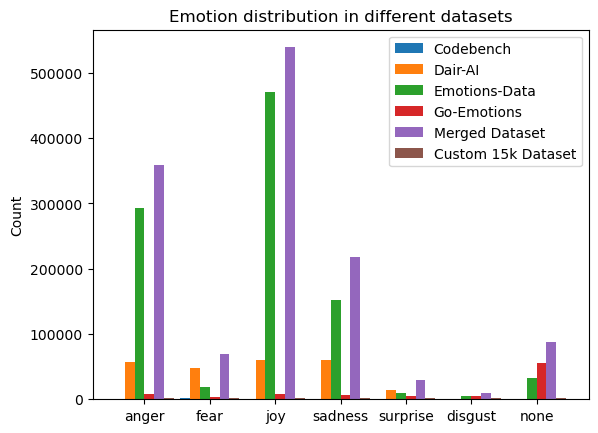

In [9]:
import json

from common import EMOTION_LABELS
import matplotlib.pyplot as plt  # noqa
import numpy as np  # noqa


class Dataset:
    def __init__(self, name: str, path: str):
        self.name = name
        self.path = path
        self.data = self.load_data()
        self.emotion_counter = {}
        for emotion in EMOTION_LABELS:
            self.emotion_counter[emotion] = 0

    def load_data(self):
        with open(self.path) as f:
            data = json.load(f)
        return data


datasets: list[Dataset] = []

datasets.append(Dataset("Codebench", "data/codabench_data/train/eng_a_parsed.json"))
datasets.append(Dataset("Dair-AI", "data/dair-ai/parsed_data.json"))
datasets.append(
    Dataset("Emotions-Data", "data/Emotions_Data/parsed_data_unpruned.json")
)
datasets.append(Dataset("Go-Emotions", "data/go_emotions/parsed_data.json"))
datasets.append(Dataset("Merged Dataset", "data/merged_data.json"))
datasets.append(Dataset("Custom 15k Dataset", "data/data_15k.json"))


for dataset in datasets:
    print("\nDataset:", dataset.name)
    for entry in dataset.data:
        for emotion in entry["emotions"]:
            dataset.emotion_counter[emotion] += 1

    print("Total datapoints:", len(dataset.data))
    print("Emotion distribution:", dataset.emotion_counter)

    sum = len(dataset.data)
    for emotion in dataset.emotion_counter:
        percentage = round(dataset.emotion_counter[emotion] / sum * 100, None)
        print(f"{emotion}: {dataset.emotion_counter[emotion]} ({percentage}%)")


# display the distribution of the emotions for each dataset as a single bar chart
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(EMOTION_LABELS))

for i, dataset in enumerate(datasets):
    emotion_counts = [dataset.emotion_counter[emotion] for emotion in EMOTION_LABELS]
    ax.bar(index + i * bar_width, emotion_counts, bar_width, label=dataset.name)

ax.set_ylabel("Count")
ax.set_title("Emotion distribution in different datasets")
ax.set_xticks(index + bar_width * 2.5)
ax.set_xticklabels(EMOTION_LABELS)
ax.legend()
plt.show()

# save under name "distribution.png"
# plt.savefig("distribution.png")
# FIXME


In [3]:
import json


PATH = "data/codabench_data/train/eng_b_parsed.json"

emotions = set()

with open(PATH) as f:
    data = json.load(f)

    for entry in data:
        for emotion in entry["emotions"]:
            emotions.add(emotion)

print(sorted(list(emotions)))

['light anger', 'light fear', 'light joy', 'light sadness', 'light surprise', 'medium anger', 'medium fear', 'medium joy', 'medium sadness', 'medium surprise', 'none', 'strong anger', 'strong fear', 'strong joy', 'strong sadness', 'strong surprise']


# Only SemEval


Dataset: Codebench
Total datapoints: 2768
Emotion distribution: {'anger': 333, 'fear': 1611, 'joy': 674, 'sadness': 878, 'surprise': 839, 'disgust': 0, 'none': 239}
anger: 333 (12.03%)
fear: 1611 (58.2%)
joy: 674 (24.35%)
sadness: 878 (31.72%)
surprise: 839 (30.31%)
disgust: 0 (0.0%)
none: 239 (8.63%)


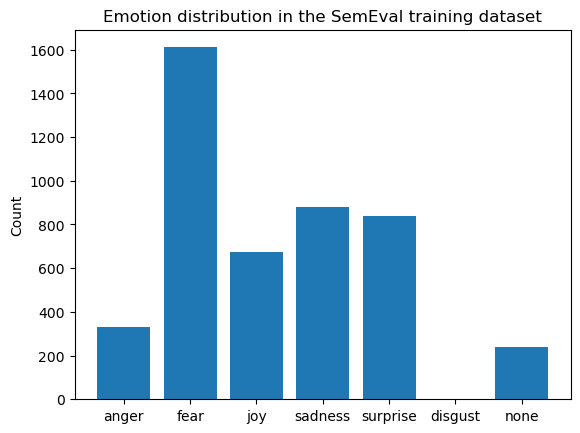

In [6]:
import json

from common import EMOTION_LABELS
import matplotlib.pyplot as plt  # noqa
import numpy as np  # noqa


class Dataset:
    def __init__(self, name: str, path: str):
        self.name = name
        self.path = path
        self.data = self.load_data()
        self.emotion_counter = {}
        for emotion in EMOTION_LABELS:
            self.emotion_counter[emotion] = 0

    def load_data(self):
        with open(self.path) as f:
            data = json.load(f)
        return data


dataset = Dataset("Codebench", "data/codabench_data/train/eng_a_parsed.json")


print("\nDataset:", dataset.name)
for entry in dataset.data:
    for emotion in entry["emotions"]:
        dataset.emotion_counter[emotion] += 1

print("Total datapoints:", len(dataset.data))
print("Emotion distribution:", dataset.emotion_counter)

sum = len(dataset.data)
for emotion in dataset.emotion_counter:
    percentage = round(dataset.emotion_counter[emotion] / sum * 100, 2)
    print(f"{emotion}: {dataset.emotion_counter[emotion]} ({percentage}%)")


# display the distribution of the emotions for each dataset as a bar chart
fig, ax = plt.subplots()
index = np.arange(len(dataset.emotion_counter))
emotion_counts = [
    dataset.emotion_counter[emotion] for emotion in dataset.emotion_counter
]
ax.bar(index, emotion_counts)
ax.set_xticks(index)
ax.set_xticklabels(dataset.emotion_counter.keys())
ax.set_ylabel("Count")
ax.set_title("Emotion distribution in the SemEval training dataset")


# save under name "distribution.png"
plt.savefig("distribution-semeval.png")

plt.show()


# Amount of Emotions per Sentence in SemEval Training

2025-02-04 11:34:41.966780: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-04 11:34:41.987659: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738665282.007830  463284 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738665282.013898  463284 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 11:34:42.041551: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr


Dataset: SemEval Trainig
Length data start: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
Length data end: {0: 239, 1: 1141, 2: 1031, 3: 298, 4: 57, 5: 2, 6: 0}


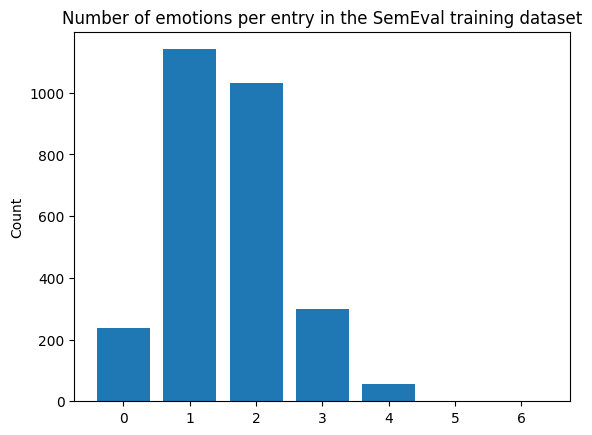

In [1]:
import json

from common import EMOTION_LABELS
import matplotlib.pyplot as plt  # noqa
import numpy as np  # noqa


class Dataset:
    def __init__(self, name: str, path: str):
        self.name = name
        self.path = path
        self.data = self.load_data()
        self.emotion_counter = {}
        for emotion in EMOTION_LABELS:
            self.emotion_counter[emotion] = 0

    def load_data(self):
        with open(self.path) as f:
            data = json.load(f)
        return data


dataset = Dataset("SemEval Trainig", "data/codabench_data/train/eng_a_parsed.json")

print("\nDataset:", dataset.name)

length_data = {}
for i in range(len(EMOTION_LABELS)):
    length_data[i] = 0

print("Length data start:", length_data)


for entry in dataset.data:
    length = len(entry["emotions"])
    if "none" in entry["emotions"]:
        length = 0
    length_data[length] += 1

print("Length data end:", length_data)

# display the distribution of the emotions for each dataset as a bar chart
fig, ax = plt.subplots()
index = np.arange(len(length_data))
emotion_counts = [length_data[key] for key in length_data]
ax.bar(index, emotion_counts)
ax.set_xticks(index)
ax.set_xticklabels(length_data.keys())
ax.set_ylabel("Count")
ax.set_title("Number of emotions per entry in the SemEval training dataset")
plt.savefig("emotions-length-semeval-training.png")
plt.show()


# Amount of Emotions per Sentence in SemEval Evaluation


Dataset: SemEval Eval
Length data start: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
Length data end: {0: 13, 1: 46, 2: 42, 3: 14, 4: 1, 5: 0, 6: 0}


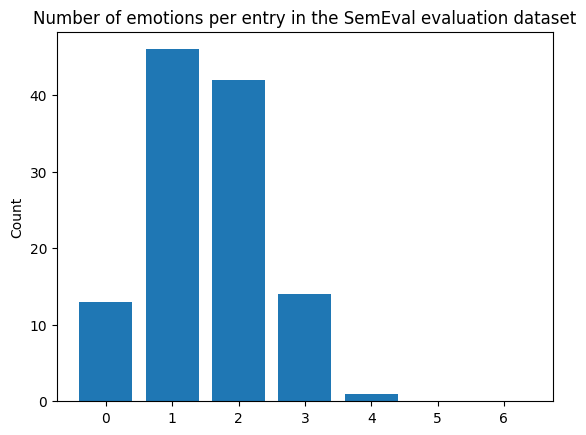

In [2]:
import json

from common import EMOTION_LABELS
import matplotlib.pyplot as plt  # noqa
import numpy as np  # noqa


class Dataset:
    def __init__(self, name: str, path: str):
        self.name = name
        self.path = path
        self.data = self.load_data()
        self.emotion_counter = {}
        for emotion in EMOTION_LABELS:
            self.emotion_counter[emotion] = 0

    def load_data(self):
        with open(self.path) as f:
            data = json.load(f)
        return data


dataset = Dataset("SemEval Eval", "data/codabench_data/dev/eng_a_parsed.json")

print("\nDataset:", dataset.name)

length_data = {}
for i in range(len(EMOTION_LABELS)):
    length_data[i] = 0

print("Length data start:", length_data)


for entry in dataset.data:
    length = len(entry["emotions"])
    if "none" in entry["emotions"]:
        length = 0
    length_data[length] += 1

print("Length data end:", length_data)

# display the distribution of the emotions for each dataset as a bar chart
fig, ax = plt.subplots()
index = np.arange(len(length_data))
emotion_counts = [length_data[key] for key in length_data]
ax.bar(index, emotion_counts)
ax.set_xticks(index)
ax.set_xticklabels(length_data.keys())
ax.set_ylabel("Count")
ax.set_title("Number of emotions per entry in the SemEval evaluation dataset")
plt.savefig("emotions-length-semeval-eval.png")
plt.show()


# Human Feedback

Average Humans: 0.57
Average Models: 0.834


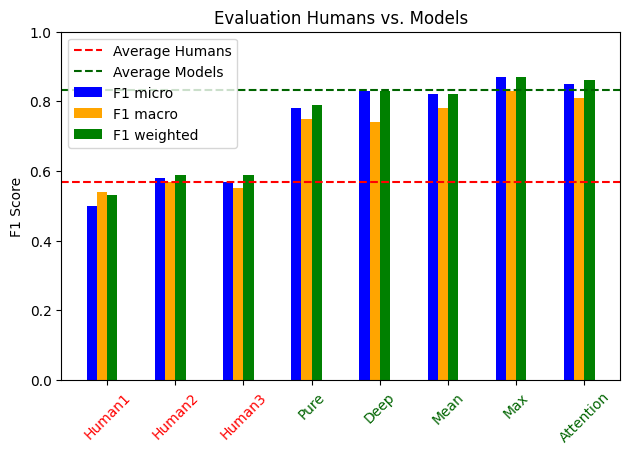

In [3]:
from common import EMOTION_LABELS
import matplotlib.pyplot as plt  # noqa
import numpy as np  # noqa


class Entity:
    def __init__(self, name: str, f1_micro: float, f1_macro: float, f1_weighted: float):
        self.name = name
        self.f1_micro = f1_micro
        self.f1_macro = f1_macro
        self.f1_weighted = f1_weighted


entities: list[Entity] = []

entities.append(Entity(name="Human1", f1_micro=0.50, f1_macro=0.54, f1_weighted=0.53))
entities.append(Entity(name="Human2", f1_micro=0.58, f1_macro=0.57, f1_weighted=0.59))
entities.append(Entity(name="Human3", f1_micro=0.57, f1_macro=0.55, f1_weighted=0.59))
# entities.append(Entity(name="Voting", f1_micro=0.87, f1_macro=0.83, f1_weighted=0.87))
entities.append(Entity(name="Pure", f1_micro=0.78, f1_macro=0.75, f1_weighted=0.79))
entities.append(Entity(name="Deep", f1_micro=0.83, f1_macro=0.74, f1_weighted=0.83))
entities.append(Entity(name="Mean", f1_micro=0.82, f1_macro=0.78, f1_weighted=0.82))
entities.append(Entity(name="Max", f1_micro=0.87, f1_macro=0.83, f1_weighted=0.87))
entities.append(
    Entity(name="Attention", f1_micro=0.85, f1_macro=0.81, f1_weighted=0.86)
)

# create a bar chart, where all f1_micro are next to each other, then all f1_macro and then all f1_weighted

fig, ax = plt.subplots()
bar_width = 0.15

index = np.arange(len(entities))

f1_micro = [entity.f1_micro for entity in entities]
f1_macro = [entity.f1_macro for entity in entities]
f1_weighted = [entity.f1_weighted for entity in entities]

average_humans = (f1_weighted[0] + f1_weighted[1] + f1_weighted[2]) / 3
average_models = (
    f1_weighted[3] + f1_weighted[4] + f1_weighted[5] + f1_weighted[6] + f1_weighted[7]
) / 5
print("Average Humans:", average_humans)
print("Average Models:", average_models)

ax.bar(index, f1_micro, bar_width, label="F1 micro", color="blue")
ax.bar(index + bar_width, f1_macro, bar_width, label="F1 macro", color="orange")
ax.bar(
    index + bar_width * 2,
    f1_weighted,
    bar_width,
    label="F1 weighted",
    color="green",
)

ax.axhline(y=average_humans, color="r", linestyle="--", label="Average Humans")
ax.axhline(y=average_models, color="darkgreen", linestyle="--", label="Average Models")

ax.set_ylabel("F1 Score")
ax.set_title("Evaluation Humans vs. Models")
ax.set_xticks(index + bar_width * 1.5)
xtick_labels = [entity.name for entity in entities]
xtick_colors = [
    "red" if name in ["Human1", "Human2", "Human3"] else "darkgreen"
    for name in xtick_labels
]
ax.set_xticklabels(xtick_labels, rotation=45)
for xtick, color in zip(ax.get_xticklabels(), xtick_colors):
    xtick.set_color(color)
ax.set_ylim(0.0, 1.0)
plt.tight_layout(rect=[0.0, 0.03, 1, 1])  # Adjust the bottom margin

ax.legend()

# save under name "evaluation-humans.png"
plt.savefig("evaluation-humans.png")

plt.show()

# Automatische Evaluation auf SemEval Evaluations Datensatz

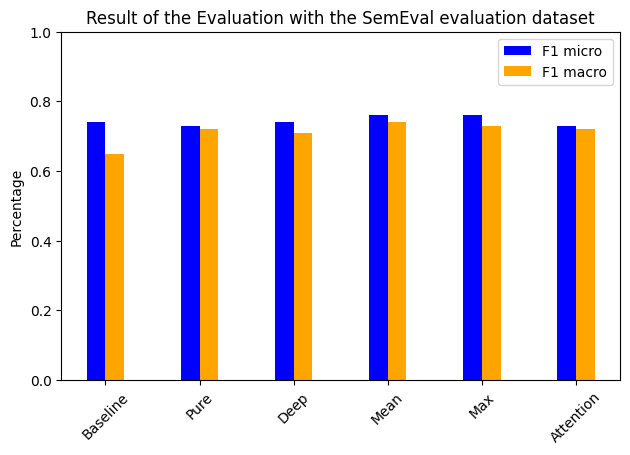

In [14]:
from common import EMOTION_LABELS
import matplotlib.pyplot as plt  # noqa
import numpy as np  # noqa


class Entity:
    def __init__(self, name: str, f1_micro: float, f1_macro: float):
        self.name = name
        self.f1_micro = f1_micro
        self.f1_macro = f1_macro


entities: list[Entity] = []

entities.append(Entity(name="Baseline", f1_micro=0.74, f1_macro=0.65))
entities.append(Entity(name="Pure", f1_micro=0.73, f1_macro=0.72))
entities.append(Entity(name="Deep", f1_micro=0.74, f1_macro=0.71))
entities.append(Entity(name="Mean", f1_micro=0.76, f1_macro=0.74))
entities.append(Entity(name="Max", f1_micro=0.76, f1_macro=0.73))
entities.append(Entity(name="Attention", f1_micro=0.73, f1_macro=0.72))


# create a bar chart, where all f1_micro are next to each other, then all f1_macro and then all f1_weighted

fig, ax = plt.subplots()
bar_width = 0.20

index = np.arange(len(entities))

f1_micro = [entity.f1_micro for entity in entities]
f1_macro = [entity.f1_macro for entity in entities]

ax.bar(index + bar_width, f1_micro, bar_width, label="F1 micro", color="blue")
ax.bar(index + 2 * bar_width, f1_macro, bar_width, label="F1 macro", color="orange")

# ax.axhline(
#     y=entities[0].f1_micro,
#     color="lightgray",
#     linestyle="--",
#     label="Baseline F1-Score micro",
# )
# ax.axhline(
#     y=entities[0].f1_macro,
#     color="lightgray",
#     linestyle="--",
#     label="Baseline F1-Score macro",
# )


ax.set_ylabel("Percentage")
plt.title("Result of the Evaluation with the SemEval evaluation dataset")
ax.set_xticks(index + bar_width * 1.5)
xtick_labels = [entity.name for entity in entities]
ax.set_xticklabels(xtick_labels, rotation=45)
ax.set_ylim(0.0, 1.0)
plt.tight_layout(rect=[0.0, 0.03, 1, 1])  # Adjust the bottom margin

ax.legend()

plt.savefig("evaluation-statistics-plot.png")

plt.show()